In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
NUMBER_OF_ROWS = 100000

In [3]:
import json

def load_data(file_name, head=NUMBER_OF_ROWS):
    count = 0
    data = []
    with open(file_name, 'r') as fin:
        for line in fin:
            d = json.loads(line)
            count += 1
            data.append(d)
            
            if head is not None and count >= head:
                break
    return data


In [4]:
book_data = load_data("./data/archive/goodreads_books.json")
authors_data = load_data("./data/archive/goodreads_book_authors.json")
reviews_data = load_data("./data/archive/goodreads_reviews_dedup.json")
genres_data = load_data("./data/archive/goodreads_book_genres_initial.json")
works_data = load_data("./data/archive/goodreads_book_works.json")
series_data = load_data("./data/archive/goodreads_book_series.json")

In [5]:
book_df = pd.DataFrame(book_data)
authors_df = pd.DataFrame(authors_data)
reviews_df = pd.DataFrame(reviews_data)
genres_df = pd.DataFrame(genres_data)
works_df = pd.DataFrame(works_data)
series_df = pd.DataFrame(series_data)
book_user_df = pd.read_csv("./data/archive/goodreads.csv", nrows=NUMBER_OF_ROWS)

In [6]:
book_user_df.columns

Index(['user_id', 'book_id', 'is_read', 'rating', 'is_reviewed'], dtype='object')

In [7]:
def data_preprocessing_pipeline(data):
    print(data.isnull().sum())

    columns_to_check = ['average_rating', 'ratings_count', 'title', 'isbn', 'authors']
    columns_to_convert = ['text_reviews_count', 'average_rating', 'publication_month', 'publication_year', 'ratings_count', 'num_pages']
    columns_to_drop = ['url', 'image_url']

    for column in columns_to_check:
        if column in data.columns:
            data.dropna(subset=[column], inplace=True)
    
    # Avoid list and dict for detect duplicates
    list_columns = [
        col for col in data.columns
        if any(not isinstance(val, list) and not isinstance(val, dict) for val in data[col])
    ]

    data = data.drop_duplicates(subset=list_columns, keep='first')

    # Convert data to numeric type
    for column in columns_to_convert:
        if column in data.columns:
            data[column] = pd.to_numeric(data[column], errors='coerce') 
    
    # Check if rating are in the correct range
    if 'average_rating' in data.columns:
        data = data[(data['average_rating'] >= 1) & (data['average_rating'] <= 5)]

    # Drop unnecessary columns
    data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    

In [8]:
book_df.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,...,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10,1323437,Good Harbor,Good Harbor
2,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,...,7,,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,...,,,,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...


In [9]:
data_preprocessing_pipeline(book_df)
data_preprocessing_pipeline(authors_df)
data_preprocessing_pipeline(reviews_df)
data_preprocessing_pipeline(genres_df)
data_preprocessing_pipeline(works_df)
data_preprocessing_pipeline(series_df)
data_preprocessing_pipeline(book_user_df)

isbn                    0
text_reviews_count      0
series                  0
country_code            0
language_code           0
popular_shelves         0
asin                    0
is_ebook                0
average_rating          0
kindle_asin             0
similar_books           0
description             0
format                  0
link                    0
authors                 0
publisher               0
num_pages               0
publication_day         0
isbn13                  0
publication_month       0
edition_information     0
publication_year        0
url                     0
image_url               0
book_id                 0
ratings_count           0
work_id                 0
title                   0
title_without_series    0
dtype: int64
average_rating        0
author_id             0
text_reviews_count    0
name                  0
ratings_count         0
dtype: int64
user_id         0
book_id         0
review_id       0
rating          0
review_text     0
date_added

<h3> Informações sobre autores </h3>

In [10]:
# Average rating
# TODO: use dataframe directly here instead of converting json list

avg_author_rating = 0.0
avg_author_reviews = 0.0

for author in authors_data:
    avg_author_rating += float(author['average_rating'])
    avg_author_reviews += float(author['text_reviews_count'])

avg_author_rating /= NUMBER_OF_ROWS
avg_author_reviews /= NUMBER_OF_ROWS


authors_by_rating_count = [(author['name'], int(author['ratings_count'])) for author in authors_data]
authors_by_average_rating = [(author['name'], float(author['average_rating'])) for author in authors_data if float(author['ratings_count']) >= 100]

df_rating_count = pd.DataFrame(authors_by_rating_count, columns=['name', 'ratings_count'])
df_average_rating = pd.DataFrame(authors_by_average_rating, columns=['name', 'average_rating'])

df_rating_count_sorted = df_rating_count.sort_values(by='ratings_count', ascending=False)
df_average_rating_sorted = df_average_rating.sort_values(by='average_rating', ascending=False)

Text(0, 0.5, 'Amount of reviews')

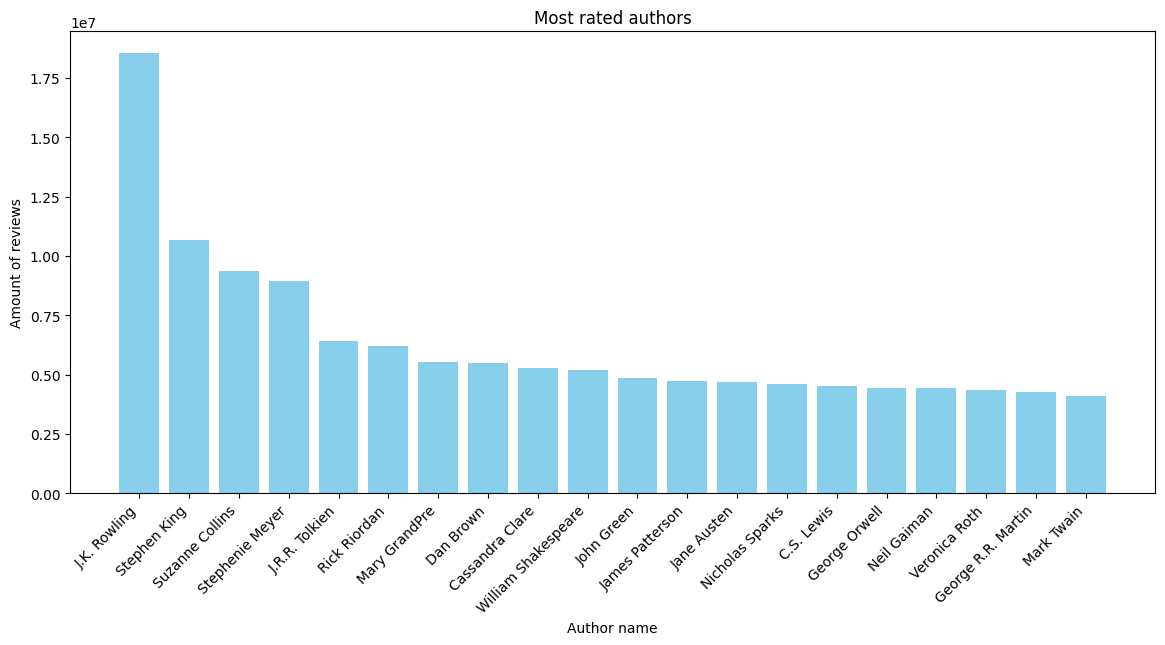

In [11]:
# Most rated authors

plt.figure(figsize=(14, 6))

plt.bar(df_rating_count_sorted['name'][0:20], df_rating_count_sorted['ratings_count'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Most rated authors")
plt.xlabel("Author name")
plt.ylabel("Amount of reviews")

Text(0, 0.5, 'Amount of reviews')

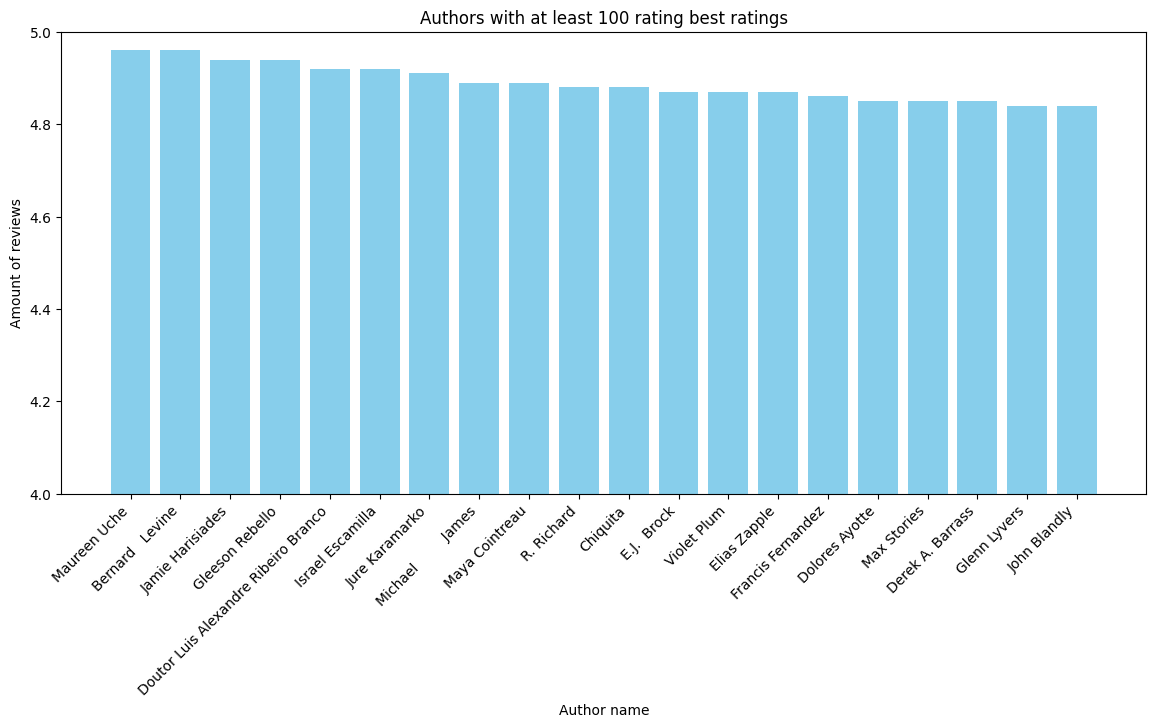

In [12]:
# Greatest ratings for players with at least 100 ratings

plt.figure(figsize=(14, 6))
plt.bar(df_average_rating_sorted['name'][0:20], df_average_rating_sorted['average_rating'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylim(4,5)
plt.title("Authors with at least 100 rating best ratings")
plt.xlabel("Author name")
plt.ylabel("Amount of reviews")

In [13]:
## All authors average rating

print(avg_author_rating)

3.869707500000017


In [14]:
# Average number of reviews per author

print(avg_author_reviews)

674.95166


<h3> Books info </h3>

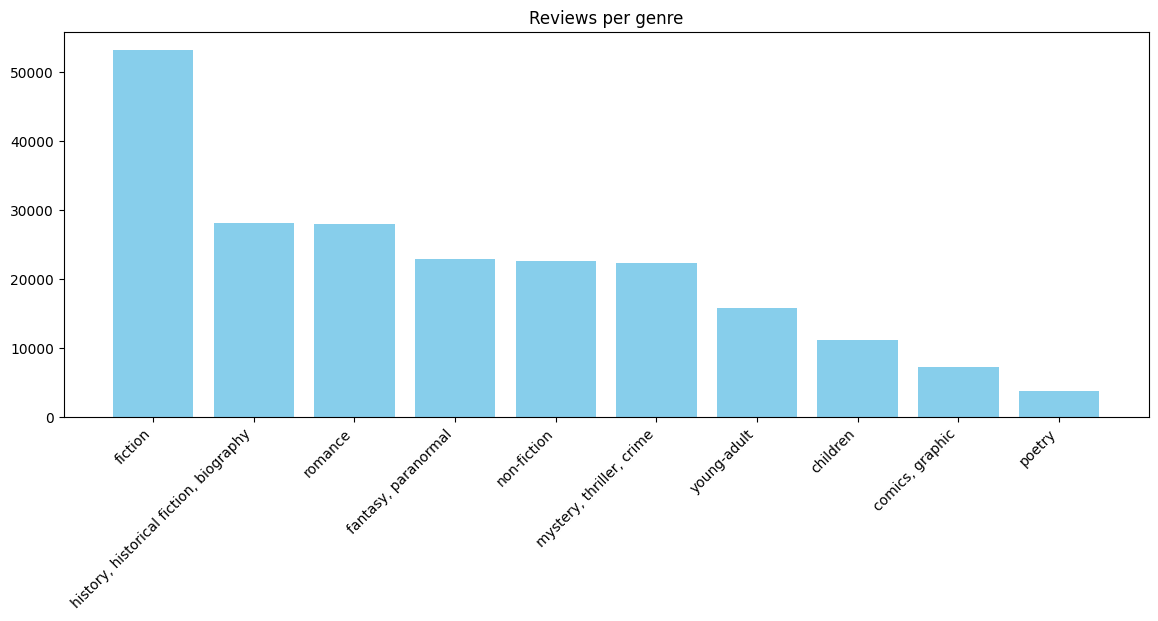

In [15]:
total_genres = {}

def get_genres(row):
    genre_list = [genre.strip() for genre in row['genres']]
    return genre_list

for idx, row in genres_df.iterrows():
    genres = get_genres(row)

    for genre in genres:
        if genre in total_genres:
            total_genres[genre] += 1
        else:
            total_genres[genre] = 1

sorted_genres_by_number_of_reviews = dict(sorted(total_genres.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14, 5))
plt.title("Reviews per genre")
plt.bar(sorted_genres_by_number_of_reviews.keys(), sorted_genres_by_number_of_reviews.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.show()

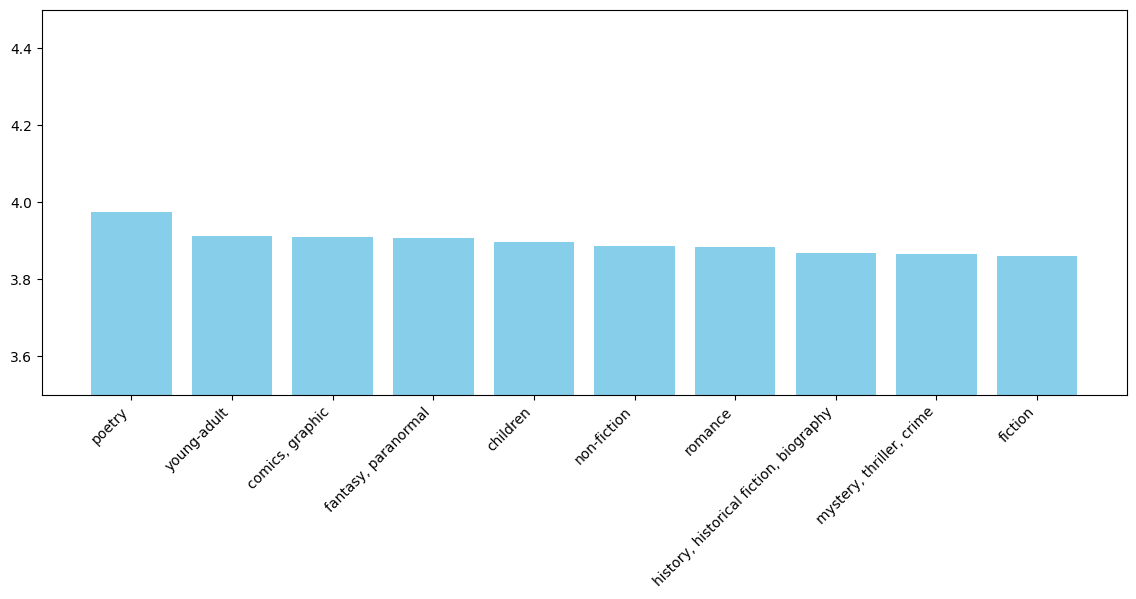

In [16]:
from collections import defaultdict

book_ratings = dict(zip(book_df['book_id'], book_df['average_rating']))

genres_rating_sum = defaultdict(float)
genres_count = defaultdict(int)

for idx, row in genres_df.iterrows():
    book_id = row['book_id']
    genres = get_genres(row)
    book_rating = book_ratings.get(book_id, 0) 

    for genre in genres:
        genres_rating_sum[genre] += float(book_rating)
        genres_count[genre] += 1

genres_rating_avg = {genre: genres_rating_sum[genre] / genres_count[genre] for genre in genres_rating_sum}

sorted_genres_by_rating = dict(sorted(genres_rating_avg.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14, 5))
plt.ylim(3.5, 4.5)
plt.bar(sorted_genres_by_rating.keys(), sorted_genres_by_rating.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.show()

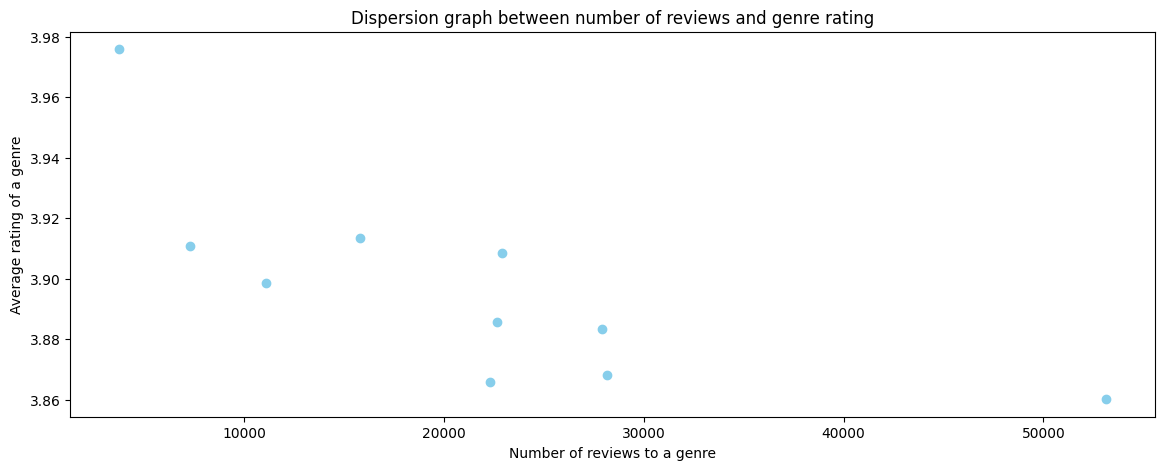

In [17]:
plt.figure(figsize=(14, 5))
plt.title("Dispersion graph between number of reviews and genre rating")
plt.xlabel("Number of reviews to a genre")
plt.ylabel("Average rating of a genre")
plt.scatter(total_genres.values(), genres_rating_avg.values(), c="skyblue")
plt.show()

In [18]:
# Livros mais bem avaliados
book_df['ratings_count'] = pd.to_numeric(book_df['ratings_count'])
books_1000_ratings = book_df[book_df['ratings_count'] >= 1000]
books_1000_ratings_best = books_1000_ratings.sort_values(by='average_rating', ascending=False)
books_1000_ratings_worst = books_1000_ratings.sort_values(by='average_rating', ascending=True)

/home/jeferson/ufpe/goodreads-book-review/goodreads/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12527 (\N{KATAKANA LETTER WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeferson/ufpe/goodreads-book-review/goodreads/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeferson/ufpe/goodreads-book-review/goodreads/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12500 (\N{KATAKANA LETTER PI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeferson/ufpe/goodreads-book-review/goodreads/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeferson/ufpe/goodr

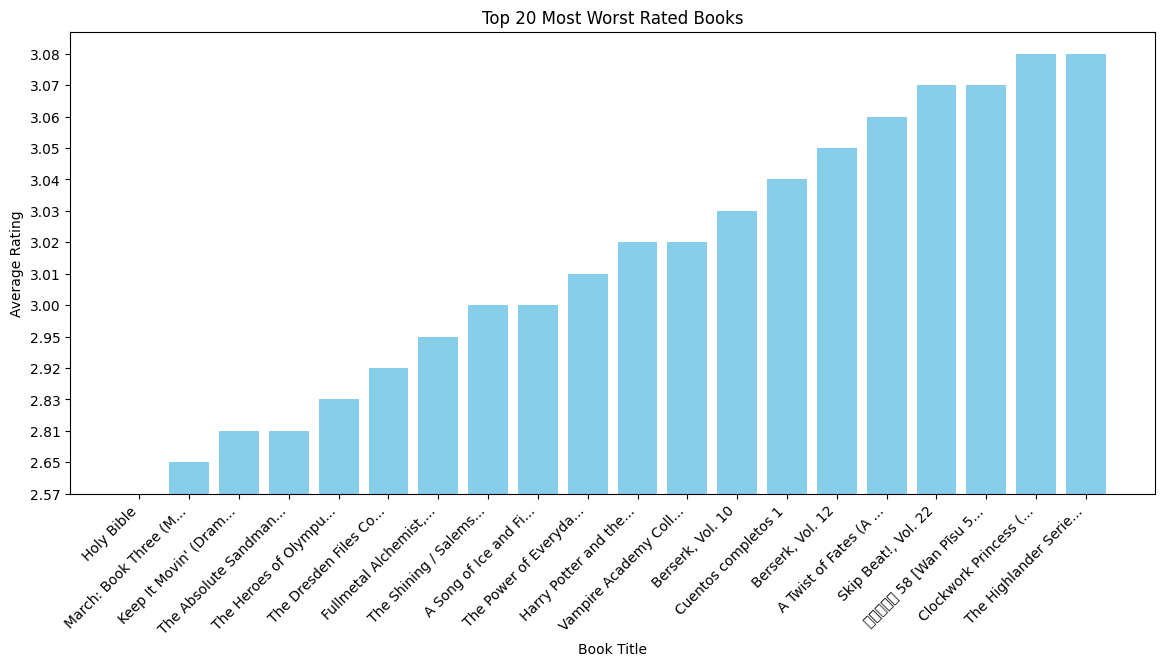

In [19]:
truncated_titles = []

for title in books_1000_ratings_best['title'][0:20]:
    if len(title) >= 20:
        title = title[0:20] + "..."
    truncated_titles.append(title)

plt.figure(figsize=(14, 6)) 
plt.bar(truncated_titles, books_1000_ratings_worst['average_rating'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Worst Rated Books")
plt.xlabel("Book Title")
plt.ylabel("Average Rating")
plt.show()

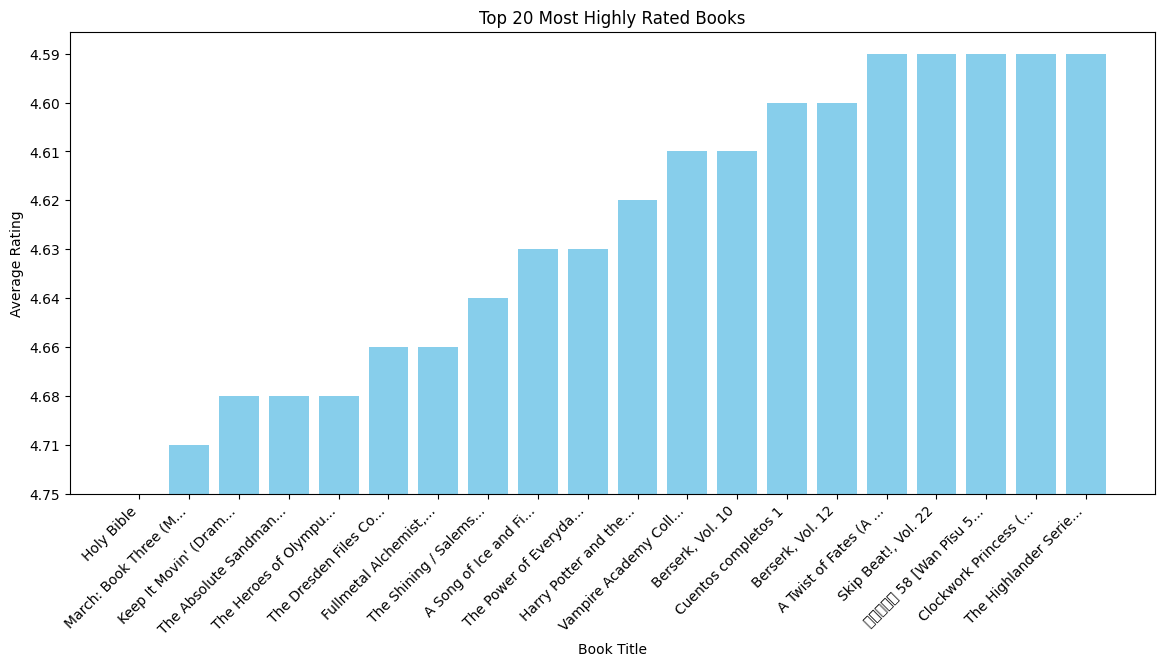

In [20]:
truncated_titles = []

for title in books_1000_ratings_best['title'][0:20]:
    if len(title) >= 20:
        title = title[0:20] + "..."
    truncated_titles.append(title)

plt.figure(figsize=(14, 6))
plt.bar(truncated_titles, books_1000_ratings_best['average_rating'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Highly Rated Books")
plt.xlabel("Book Title")
plt.ylabel("Average Rating")
plt.show()

<h3> Preparação dos dados para modelagem </h3>

In [21]:
book_df.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')

In [22]:
# genero, numero de avaliaçoes, media de avaliações, autor, 

book_df.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3.0,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,...,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10.0,1323437,Good Harbor,Good Harbor
2,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140.0,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,...,7,,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184.0,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,...,,,,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15.0,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...


In [23]:
# Drop unnecessary columns
books_df_model = book_df[["book_id", "average_rating", "ratings_count"]]
books_df_model

,book_id,average_rating,ratings_count
0,5333265,4.00,3.0
1,1333909,3.23,10.0
2,7327624,4.03,140.0
3,6066819,3.49,51184.0
4,287140,3.40,15.0
...,...,...,...
99995,36110147,4.50,10.0
99996,24679885,4.19,95.0
99997,27883170,3.51,276.0
99998,35992614,4.33,15.0


In [24]:
books_df_model = books_df_model.merge(genres_df[['book_id', 'genres']], on='book_id', how='left')

In [25]:
df_expanded = books_df_model['genres'].apply(lambda x: list(x.keys()))

one_hot_encoded = df_expanded.apply(lambda genres: pd.Series({genre: 1 for genre in genres}))
one_hot_encoded = one_hot_encoded.fillna(0).astype(int)

books_df_model = books_df_model.drop(columns="genres")

In [26]:
books_df_model = pd.concat([books_df_model, one_hot_encoded],  axis=1)

In [27]:
books_df_model['average_rating'] = books_df_model['average_rating'].replace('', np.nan).astype(float)
books_df_model['book_avaliation'] = np.where(books_df_model['average_rating'] >= 4.0, 1, 0)

In [28]:
books_df_model

,book_id,average_rating,ratings_count,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic",book_avaliation
0,5333265,4.00,3.0,1,0,0,0,0,0,0,0,0,0,1
1,1333909,3.23,10.0,1,1,0,0,0,0,0,0,0,0,0
2,7327624,4.03,140.0,0,1,1,1,1,0,0,0,0,0,1
3,6066819,3.49,51184.0,0,1,0,1,0,1,0,0,0,0,0
4,287140,3.40,15.0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,36110147,4.50,10.0,0,0,0,0,0,0,0,0,0,0,1
99996,24679885,4.19,95.0,0,1,1,1,0,0,0,1,1,0,1
99997,27883170,3.51,276.0,1,1,1,1,0,0,0,0,1,0,0
99998,35992614,4.33,15.0,0,0,0,0,0,1,0,0,0,0,1


In [29]:
books_df_model['average_rating'] = pd.to_numeric(books_df_model['average_rating']) 
books_df_model['book_id'] = pd.to_numeric(books_df_model['book_id']) 
books_df_model['ratings_count'] = pd.to_numeric(books_df_model['ratings_count']) 

In [30]:
books_df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   book_id                                 100000 non-null  int64  
 1   average_rating                          99981 non-null   float64
 2   ratings_count                           99981 non-null   float64
 3   history, historical fiction, biography  100000 non-null  int64  
 4   fiction                                 100000 non-null  int64  
 5   fantasy, paranormal                     100000 non-null  int64  
 6   mystery, thriller, crime                100000 non-null  int64  
 7   poetry                                  100000 non-null  int64  
 8   romance                                 100000 non-null  int64  
 9   non-fiction                             100000 non-null  int64  
 10  children                                10000

In [31]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['ratings_count', 'average_rating']

scaler = StandardScaler()
books_df_model[columns_to_scale] = scaler.fit_transform(books_df_model[columns_to_scale])

In [32]:
data_preprocessing_pipeline(books_df_model)

book_id                                    0
average_rating                            19
ratings_count                             19
history, historical fiction, biography     0
fiction                                    0
fantasy, paranormal                        0
mystery, thriller, crime                   0
poetry                                     0
romance                                    0
non-fiction                                0
children                                   0
young-adult                                0
comics, graphic                            0
book_avaliation                            0
dtype: int64


In [33]:
y = books_df_model["book_avaliation"]
X_scaled_train = books_df_model.drop(columns=["book_id", "book_avaliation"])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_train, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_class = logistic_regression.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
score = f1_score(y_test, y_pred_class)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {score}")

Acurácia: 0.99554933239986
Precisão: 0.9914599906410856
Recall: 0.9981156518666824
F1 score: 0.9947766887728153


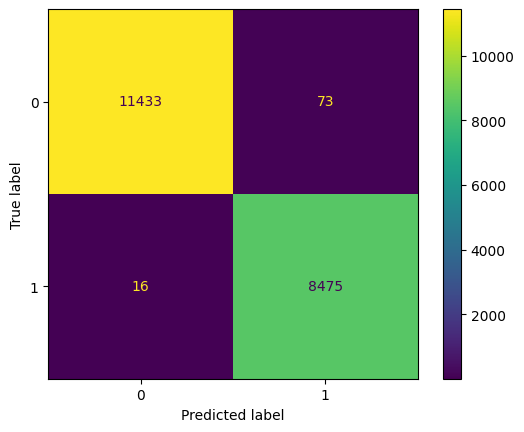

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_class, labels=logistic_regression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logistic_regression.classes_)
disp.plot()
plt.show()

<h3> Criando modelo com Random Forest </h3>

In [38]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=2)

In [39]:
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
score = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {score}")

Acurácia: 0.9991998799819973
Precisão: 1.0
Recall: 0.9981156518666824
F1 score: 0.9990569374042202


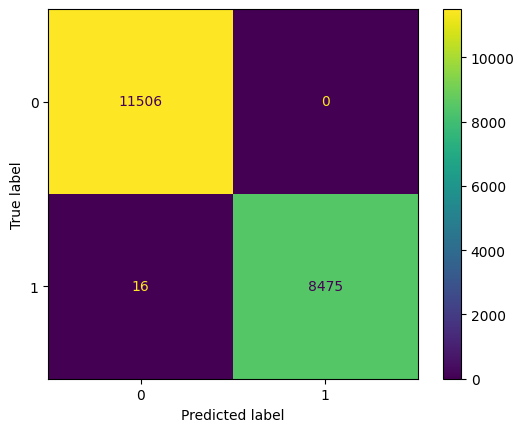

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_forest.classes_)
disp.plot()
plt.show()